<a href="https://colab.research.google.com/github/pagutierrez/imcexamplenb/blob/main/notebook.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.png" alt="Open In Colab"/></a>

# Introduction to Computational Models. Lab Assignment 4. Support Vector Machines. 

This lab assignment serves to familiarise the student with support vector machines (SVMs).
In this way, we will use the SVMs for various classification problems, so that the student can
better understand their behaviour and, above all, the effect of their parameters. To do this,
we will use its implementation in `scikit-learn` with the `libsvm` library, one of the most
efficient implementations available today, as well as being free and open source.

## Question 1

Open this script and explain its contents. You will see that the first dataset
is used, and the SVM is graphically represented. Comment on what type of kernel is being
used, and what are the training parameters.

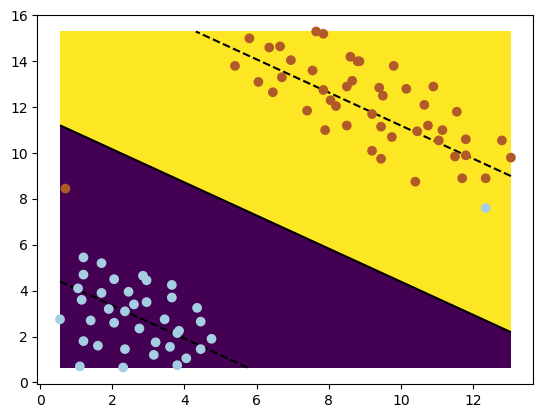

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/pagutierrez/imcexamplenb/main/data/dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Train the SVM model
svm_model = svm.SVC(kernel='linear',C=0.001)
svm_model.fit(X, y)

# Show the points
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Show the separating hyperplane
plt.axis('tight')
# Extract the limit of the data to construct the mesh
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Create the mesh and obtain the Z value returned by the SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
# separating hyperplane (Z=0)
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])

plt.show()
